In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

In [2]:
# Funcion de activacion 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
# Inicializacion de los parametros 
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters

In [4]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [5]:
# Funcion de perdida
def loss_function(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)

    return cost

In [6]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [8]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    print(f"Parameters before: %s",parameters)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

In [9]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

In [10]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.3

trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements. 
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [1]])

print(f"Parameters after: %s",trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

Parameters before: %s {'W1': array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081]]), 'b1': array([[-1.79343559],
       [-0.84174737]]), 'W2': array([[ 0.50288142, -1.24528809]]), 'b2': array([[-1.05795222]])}
Cost after iteration# 0: 1.052558
Cost after iteration# 100: 0.695402
Cost after iteration# 200: 0.693668
Cost after iteration# 300: 0.693206
Cost after iteration# 400: 0.692966
Cost after iteration# 500: 0.692779
Cost after iteration# 600: 0.692587
Cost after iteration# 700: 0.692352
Cost after iteration# 800: 0.692030
Cost after iteration# 900: 0.691539
Cost after iteration# 1000: 0.690679
Parameters after: %s {'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}
Neural Network prediction for example (1, 1) is 1


## Problema 1

In [11]:
def initialize_parameters_zeros(n_x, n_h, n_y):
    W1 = np.zeros((n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.zeros((n_y, n_h))
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters


In [12]:
def model_with_zeros(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters_zeros(n_x, n_h, n_y)
    
    print(f"Parameters before: %s",parameters)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

In [14]:

trained_parameters = model_with_zeros(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

X_test = np.array([[1], [1]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

Parameters before: %s {'W1': array([[0., 0.],
       [0., 0.]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[0., 0.]]), 'b2': array([[0.]])}
Cost after iteration# 0: 0.693147
Cost after iteration# 100: 0.693147
Cost after iteration# 200: 0.693147
Cost after iteration# 300: 0.693147
Cost after iteration# 400: 0.693147
Cost after iteration# 500: 0.693147
Cost after iteration# 600: 0.693147
Cost after iteration# 700: 0.693147
Cost after iteration# 800: 0.693147
Cost after iteration# 900: 0.693147
Cost after iteration# 1000: 0.693147
{'W1': array([[0., 0.],
       [0., 0.]]), 'W2': array([[0., 0.]]), 'b1': array([[0.],
       [0.]]), 'b2': array([[0.]])}
Neural Network prediction for example (1, 1) is 1


## Problema 2

In [100]:
def model_return_costs(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    print(f"Parameters before: %s",parameters)
    costs = []

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))
            costs.append((i,cost))

    print(f"Parameters after: %s",parameters)
    return costs

In [ ]:
import matplotlib.pyplot as plt

In [82]:
num_of_iters = 5000

In [101]:
costs01 = model_return_costs(X, Y, n_x, n_h, n_y, num_of_iters, 0.01)
costs1 = model_return_costs(X, Y, n_x, n_h, n_y, num_of_iters, 0.1)
costs5 = model_return_costs(X, Y, n_x, n_h, n_y, num_of_iters, 0.5)

Parameters before: %s {'W1': array([[-0.38348518, -2.18417756],
       [-1.51620476, -1.63388363]]), 'b1': array([[0.5898943 ],
       [1.80914499]]), 'W2': array([[-0.19503791, -1.33435858]]), 'b2': array([[0.68292137]])}
Cost after iteration# 0: 0.890492
Cost after iteration# 100: 0.810789
Cost after iteration# 200: 0.743042
Cost after iteration# 300: 0.691865
Cost after iteration# 400: 0.655070
Cost after iteration# 500: 0.628535
Cost after iteration# 600: 0.608690
Cost after iteration# 700: 0.593047
Cost after iteration# 800: 0.580043
Cost after iteration# 900: 0.568749
Cost after iteration# 1000: 0.558628
Cost after iteration# 1100: 0.549368
Cost after iteration# 1200: 0.540784
Cost after iteration# 1300: 0.532766
Cost after iteration# 1400: 0.525246
Cost after iteration# 1500: 0.518175
Cost after iteration# 1600: 0.511519
Cost after iteration# 1700: 0.505249
Cost after iteration# 1800: 0.499341
Cost after iteration# 1900: 0.493770
Cost after iteration# 2000: 0.488514
Cost after i

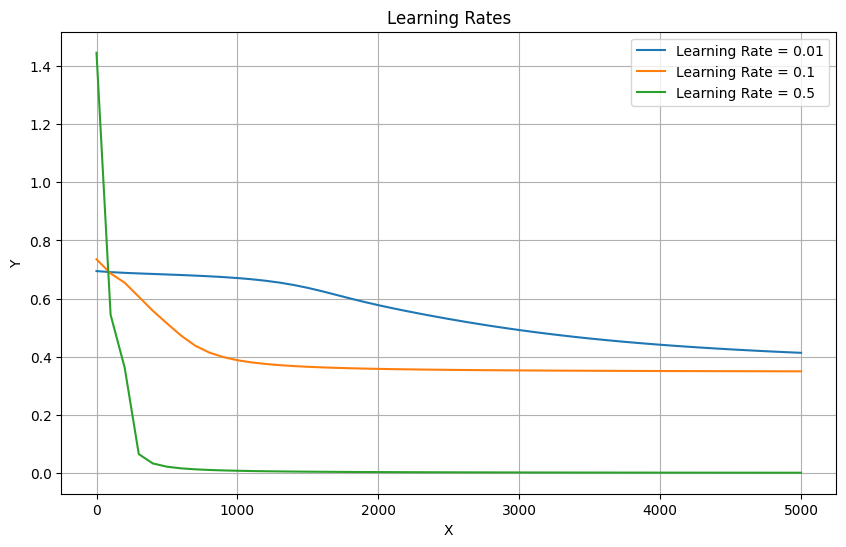

In [99]:


x1, y1 = zip(*costs01)
x2, y2 = zip(*costs1)
x3, y3 = zip(*costs5)

plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Learning Rate = 0.01')
plt.plot(x2, y2, label='Learning Rate = 0.1')
plt.plot(x3, y3, label='Learning Rate = 0.5')

plt.title('Learning Rates')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.grid(True)
plt.show()

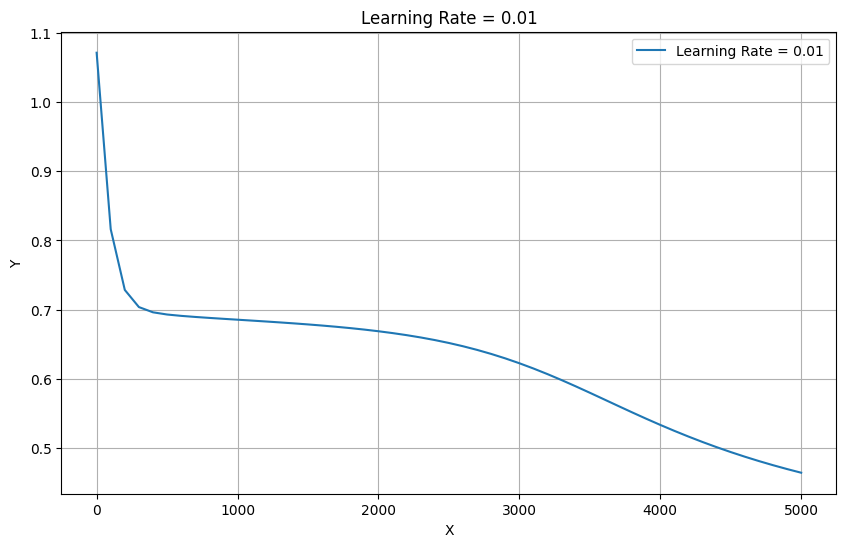

In [86]:
plt.figure(figsize=(10, 6))

plt.plot(x1, y1, label='Learning Rate = 0.01')

plt.title('Learning Rate = 0.01')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.grid(True)
plt.show()

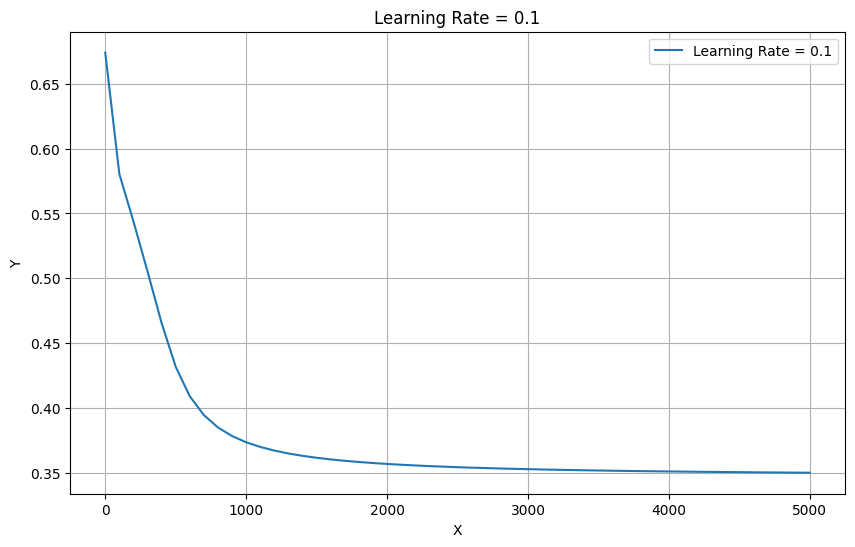

In [88]:
plt.figure(figsize=(10, 6))

plt.plot(x2, y2, label='Learning Rate = 0.1')

plt.title('Learning Rate = 0.1')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.grid(True)
plt.show()

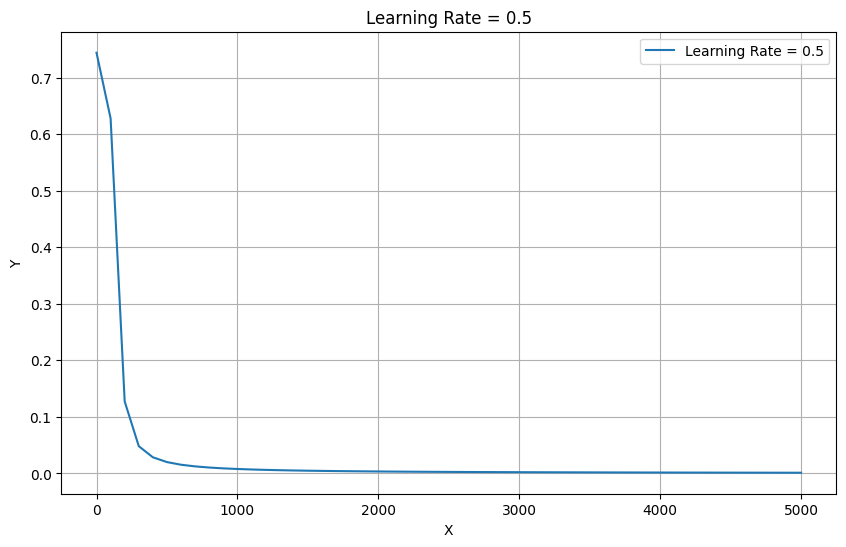

In [89]:
plt.figure(figsize=(10, 6))

plt.plot(x3, y3, label='Learning Rate = 0.5')

plt.title('Learning Rate = 0.5')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()

plt.grid(True)
plt.show()